In [79]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers, layers, models
from tensorflow.keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical

import h5py

<h1><center><font size=8>PART A</center></font></h1>


DOMAIN: Electronics and Telecommunication

• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

• DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

### 1. Data import and Understanding 

#### A. Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [80]:
df = pd.read_csv('Signal.csv')
df.head(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### B. Check for missing values and print percentage for each attribute

In [81]:
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [82]:
missing_percentage = df.isnull().mean() * 100

# Print the percentage of missing values for each column
print(missing_percentage)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [83]:
# displaying the summary of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [84]:
df.duplicated().sum()

240

In [85]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

# Display any duplicate rows found
print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [86]:
print("Shape of the dataset before removing duplicate rows: ",df.shape)

Shape of the dataset before removing duplicate rows:  (1599, 12)


In [87]:
df=df.drop_duplicates()
print("Shape of the dataset after removing duplicate rows: ",df.shape)

Shape of the dataset after removing duplicate rows:  (1359, 12)


#### D. Visualise distribution of the target variable

In [88]:
df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

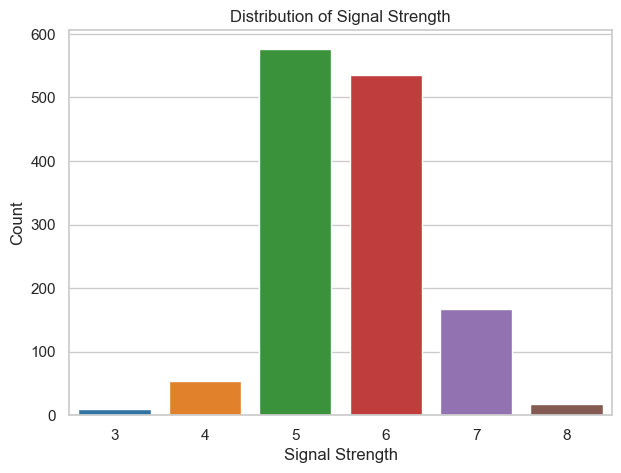

In [89]:
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(7, 5))
sns.countplot(x='Signal_Strength', data=df, palette='tab10')
plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.title('Distribution of Signal Strength')
plt.show()

#### E. Share insights from the initial data analysis (at least 2).

1. The distribution of the Signal_Strength variable indicates that most signal strengths range between 5 and 6 in the dataset. This range has a higher frequency of instances compared to other signal strength levels, suggesting an imbalance in the dataset with a bias toward these specific values.

2. Examining the statistical summary of parameters from Parameter 1 to Parameter 11, we notice significant differences in their ranges and standard deviations. For example, Parameter 6 has a notably larger standard deviation compared to the others, indicating greater variability in its values. This variability among parameters could affect the prediction of signal strength and needs to be carefully considered during model training.

### 2. Data preprocessing

#### A. Split the data into X & Y. 

In [90]:
# Split the data into X and Y
X = df.drop('Signal_Strength', axis=1)
Y = df['Signal_Strength']


In [91]:
# Display the shapes of X and Y

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1359, 11)
Shape of Y: (1359,)


#### B. Split the data into train & test with 70:30 proportion.

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### C. Print shape of all the 4 variables and verify if train and test data is in sync.

In [93]:
# Print the shapes of the variables
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

# Verify if train and test data are in sync
def check_data_sync(X_train, Y_train, X_test, Y_test):
    if X_train.shape[0] != Y_train.shape[0]:
        print("Mismatch in number of training samples between X_train and Y_train")
    else:
        print("Training data is in sync")
        
    if X_test.shape[0] != Y_test.shape[0]:
        print("Mismatch in number of test samples between X_test and Y_test")
    else:
        print("Test data is in sync")

Shape of X_train: (951, 11)
Shape of Y_train: (951,)
Shape of X_test: (408, 11)
Shape of Y_test: (408,)


In [94]:
check_data_sync(X_train, Y_train, X_test, Y_test)

Training data is in sync
Test data is in sync


#### D. Normalise the train and test data with appropriate method.

In [95]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and test data transform it using same scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### E. Transform Labels into format acceptable by Neural Network 

In [96]:
# Initialize the LabelBinarizer
label_binarizer = LabelBinarizer()

Y_train_encoded = label_binarizer.fit_transform(Y_train)
Y_test_encoded = label_binarizer.transform(Y_test)

### 3. Model Training & Evaluation using Neural Network

#### A. Design a Neural Network to train a classifier

In [97]:
# Initialize the neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(11,)))  # Input layer with 11 input features
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(6, activation='softmax'))  # Output layer with six neurons for six classes

# Compile the model
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,478 (13.59 KB)

 Trainable params: 3,478 (13.59 KB)

 Non-trainable params: 0 (0.00 B)

#### B. Train the classifier using previously designed Architecture 

In [99]:
train_class = model.fit(X_train_scaled, Y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, Y_test_encoded))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2720 - loss: 1.6823 - val_accuracy: 0.5172 - val_loss: 1.2986
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.5458 - loss: 1.2234 - val_accuracy: 0.5980 - val_loss: 1.0930
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.5401 - loss: 1.1214 - val_accuracy: 0.5931 - val_loss: 1.0299
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.5785 - loss: 1.0475 - val_accuracy: 0.6029 - val_loss: 1.0049
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.5606 - loss: 1.0361 - val_accuracy: 0.6152 - val_loss: 0.9863
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.5720 - loss: 1.0114 - val_accuracy: 0.5980 - val_loss: 0.9800
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.5934 - loss: 0.9912 - val_accuracy: 0.6103 - val_loss: 0.9695
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.6132 - loss: 0.9743 - val_accuracy: 0.58

#### C. Plot 2 separate visuals
i. Training Loss and Validation Loss

ii. Training Accuracy and Validation Accuracy

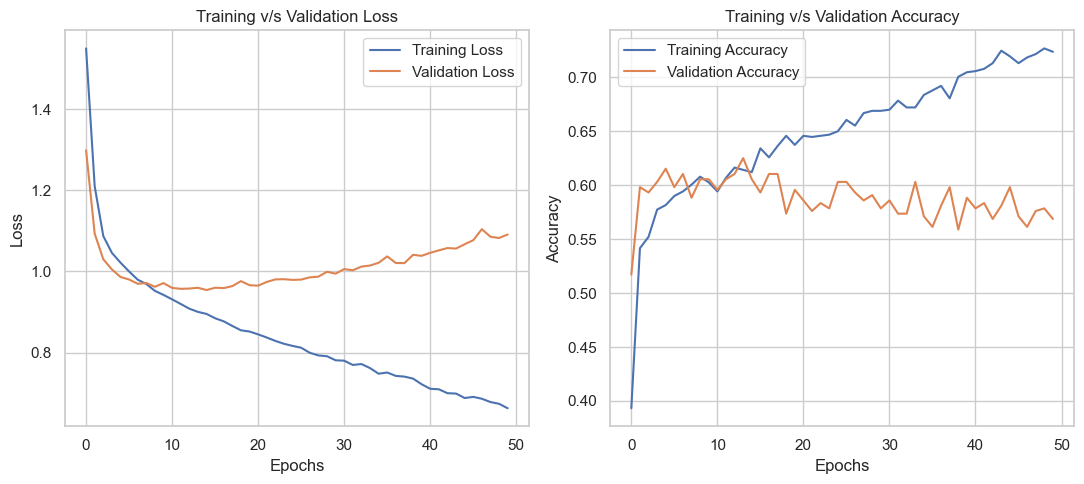

In [100]:
plt.figure(figsize=(11, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_class.history['loss'], label='Training Loss')
plt.plot(train_class.history['val_loss'], label='Validation Loss')
plt.title('Training v/s Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_class.history['accuracy'], label='Training Accuracy')
plt.plot(train_class.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training v/s Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### D. Design new architecture/update existing architecture in attempt to improve the performance of the model. 

In [101]:
# Define a new model with dropout layers
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))  # Adding dropout layer with 20% dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
# Train the classifier with the updated architecture
train_update = model.fit(X_train_scaled, Y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, Y_test_encoded))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1635 - loss: 1.7792 - val_accuracy: 0.5270 - val_loss: 1.4074
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.4816 - loss: 1.3860 - val_accuracy: 0.5662 - val_loss: 1.2030
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.5189 - loss: 1.2239 - val_accuracy: 0.5760 - val_loss: 1.1060
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.5435 - loss: 1.1614 - val_accuracy: 0.5735 - val_loss: 1.0594
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.5223 - loss: 1.1326 - val_accuracy: 0.5784 - val_loss: 1.0342
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.5421 - loss: 1.1035 - val_accuracy: 0.5931 - val_loss: 1.0163
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.5639 - loss: 1.0654 - val_accuracy: 0.5858 - val_loss: 1.0051
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.5653 - loss: 1.0415 - val_accuracy: 0.59

#### E. Plot visuals as in Q3.C and share insights about difference observed in both the models. 

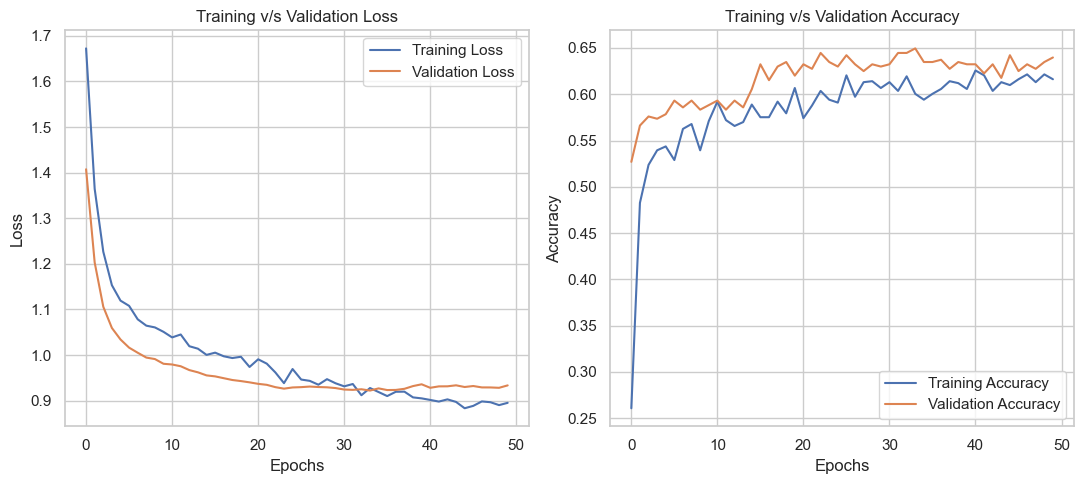

In [103]:
plt.figure(figsize=(11, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_update.history['loss'], label='Training Loss')
plt.plot(train_update.history['val_loss'], label='Validation Loss')
plt.title('Training v/s Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_update.history['accuracy'], label='Training Accuracy')
plt.plot(train_update.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training v/s Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1. Accuracy and Loss Trends

Base Model:

The training accuracy began at 27.20% and increased to 70.79% by the 50th epoch.
The validation accuracy fluctuated, starting at 51.72%, peaking around 61.03% at earlier epochs, and dropping to 56.86% by the final epoch.
The training loss decreased from 1.6823 to 0.6865.
The validation loss initially decreased but eventually increased, starting at 1.2986, reaching a minimum of 0.9541 around the 15th epoch, and ending at 1.0909.

Updated Model:

The training accuracy started lower at 16.35% but increased steadily, reaching 59.46% by the truncated output.
The validation accuracy showed improvement, starting at 52.70% and reaching 63.24% by the 22nd epoch.
The training loss decreased from 1.7792 to 0.9307.
The validation loss also showed a consistent decline, from 1.4074 to 0.9297 by the 26th epoch.

2. Model Overfitting

Base Model:

Early signs of overfitting are visible, particularly from around the 15th epoch. While training accuracy continued to improve, validation accuracy plateaued and then declined. Validation loss similarly began to increase after an initial decrease, suggesting that the model was learning too much from the training data and failing to generalize well to the validation data.

Updated Model:

The updated model appears to manage overfitting better. Validation loss consistently decreases alongside training loss, and validation accuracy continues to improve, suggesting better generalization and a more robust model.

3. Training Dynamics

Base Model:
The base model displayed rapid initial improvement but struggled to maintain this momentum, particularly in validation performance. This could suggest that the model architecture was either too complex or not adequately regularized, leading to quick but shallow learning.

Updated Model:

The slower but steadier improvement in the updated model’s training and validation accuracy/loss suggests a more stable learning process. This may indicate that changes to the model architecture or training strategy allowed for better optimization.

4. Early Stopping Potential

Base Model:

The base model could have benefited from early stopping around the 15th epoch when validation performance peaked. Continuing training past this point led to diminishing returns and potential overfitting.

Updated Model:

The updated model’s performance was still improving by the 26th epoch, with no clear signs of overfitting yet. Early stopping might not be necessary until later epochs, suggesting that this model has a higher capacity for learning without overfitting.

#### Conclusion
The updated model demonstrates a more consistent and stable learning process compared to the base model, with better management of overfitting and improved generalization to validation data. This suggests that the modifications made to the model were effective in enhancing performance and training stability.

<h1><center><font size=8>PART B</center></font></h1>


• DOMAIN: Autonomous Vehicles
    
• CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.

• DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/

Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.

PROJECT OBJECTIVE: To build a digit classifier on the SVHN dataset.

### 1. Data Import and Exploration 

#### A. Read the .h5 file and assign to a variable

#### B. Print all the keys from the .h5 file

In [26]:
file_path = 'grey1.h5'

hdf_file = h5py.File(file_path, 'r')

# List all groups to understand the structure
print("Keys: %s" % hdf_file.keys())

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [27]:
#Accessing the data

X_train = hdf_file['X_train'][:]
X_test = hdf_file['X_test'][:]
X_val = hdf_file['X_val'][:]
y_train = hdf_file['y_train'][:]
y_test = hdf_file['y_test'][:]
y_val = hdf_file['y_val'][:]

#### C. Split the data into X_train, X_test, Y_train, Y_test

The data is already split in the dataset

### 2. Data Visualisation and preprocessing 

#### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [28]:
# Print the shapes of the variables
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

# Verify if train and test data are in sync
def check_data_sync(X_train, Y_train, X_test, Y_test):
    if X_train.shape[0] != Y_train.shape[0]:
        print("Mismatch in number of training samples between X_train and Y_train")
    else:
        print("Training data is in sync")
        
    if X_test.shape[0] != Y_test.shape[0]:
        print("Mismatch in number of test samples between X_test and Y_test")
    else:
        print("Test data is in sync")

Shape of X_train: (42000, 32, 32)
Shape of Y_train: (951,)
Shape of X_test: (18000, 32, 32)
Shape of Y_test: (408,)


In [29]:
check_data_sync(X_train, y_train, X_test, y_test)

Training data is in sync
Test data is in sync


#### B. Visualise first 10 images in train data and print its corresponding labels. 

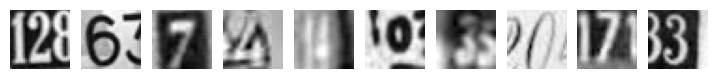

Labels for the first 10 images in the training set:
[2 6 7 4 4 0 3 0 7 3]


In [30]:
plt.figure(figsize=(9, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Print the corresponding labels
print("Labels for the first 10 images in the training set:")
print(y_train[:10])

#### C. Reshape all the images with appropriate shape update the data in same variable.

In [31]:
# Reshape the images in the dataset
X_train = np.reshape(X_train, (X_train.shape[0], 32, 32, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 32, 32, 1))

print("Updated shapes after reshaping:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Updated shapes after reshaping:
X_train shape: (42000, 32, 32, 1)
X_test shape: (18000, 32, 32, 1)


#### D. Normalise the images i.e. Normalise the pixel values

In [32]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

#### E. Transform Labels into format acceptable by Neural Network 

In [33]:
# Transform labels to categorical
num_classes = 10  # (digits 0 to 9)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#### F. Print total Number of classes in the Dataset

In [34]:
num_class = len(np.unique(y_train))
print("Total number of classes in the dataset:", num_class)

Total number of classes in the dataset: 2


Label for image at index 1 is 2
Label for image at index 2 is 6
Label for image at index 3 is 7
Label for image at index 4 is 4
Label for image at index 5 is 4
Label for image at index 6 is 0
Label for image at index 7 is 3
Label for image at index 8 is 0
Label for image at index 9 is 7
Label for image at index 10 is 3


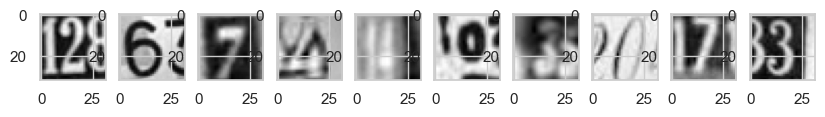

In [35]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'Label for image at index {i+1} is {np.argmax(y_train[0:10][i])}')

### 3. Model Training & Evaluation using Neural Network

#### A. Design a Neural Network to train a classifier.

In [36]:
# Define the neural network model
model = models.Sequential()

# Flatten the input data
model.add(layers.Flatten(input_shape=(32, 32)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,106 (547.29 KB)

 Trainable params: 140,106 (547.29 KB)

 Non-trainable params: 0 (0.00 B)

#### B. Train the classifier using previously designed Architecture (Use best suitable parameters)

In [38]:
train_class = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1130 - loss: 2.3072 - val_accuracy: 0.2642 - val_loss: 1.9894
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3760 - loss: 1.7888 - val_accuracy: 0.5259 - val_loss: 1.4192
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5704 - loss: 1.3277 - val_accuracy: 0.6258 - val_loss: 1.1936
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6219 - loss: 1.2032 - val_accuracy: 0.6308 - val_loss: 1.1572
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6456 - loss: 1.1394 - val_accuracy: 0.6604 - val_loss: 1.0938
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6625 - loss: 1.0826 - val_accuracy: 0.6736 - val_loss: 1.0595
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6768 - loss: 1.0578 - val_accuracy: 0.6844 - val_loss: 1.0260
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6909 - loss: 1.0064 - val_accuracy: 0.

#### C. Evaluate performance of the model with appropriate metrics.

In [39]:
y_pred=model.predict(X_test)


563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


In [40]:
# Convert one-hot encoded y_test to integer labels

y_test_int = np.argmax(y_test, axis=1)

In [41]:
# Convert predictions to class labels

y_pred_classes = np.argmax(y_pred, axis=1)

In [42]:
print(classification_report(y_test_int, y_pred_classes))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1814
           1       0.77      0.84      0.80      1828
           2       0.81      0.79      0.80      1803
           3       0.71      0.77      0.74      1719
           4       0.83      0.78      0.81      1812
           5       0.81      0.71      0.75      1768
           6       0.74      0.80      0.76      1832
           7       0.85      0.81      0.83      1808
           8       0.79      0.68      0.73      1812
           9       0.75      0.76      0.75      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



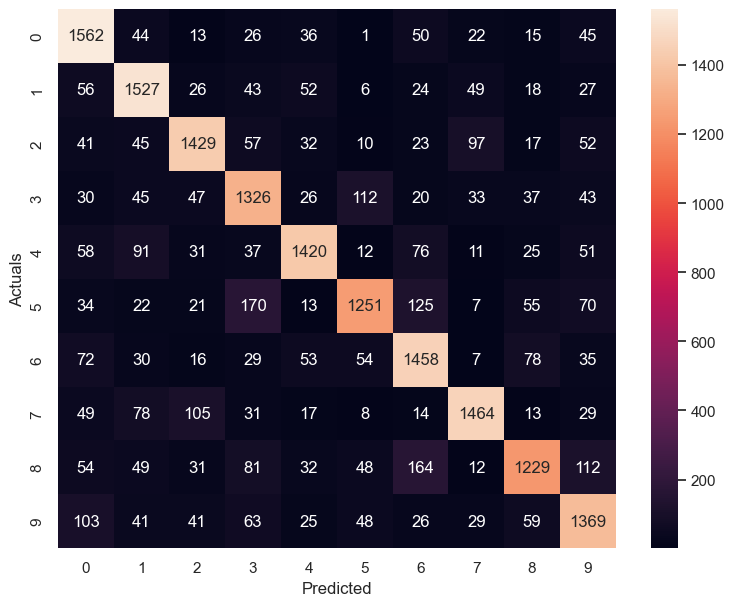

In [43]:
cm=confusion_matrix(y_test_int,y_pred_classes)

plt.figure(figsize=(9,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.show()

#### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. 

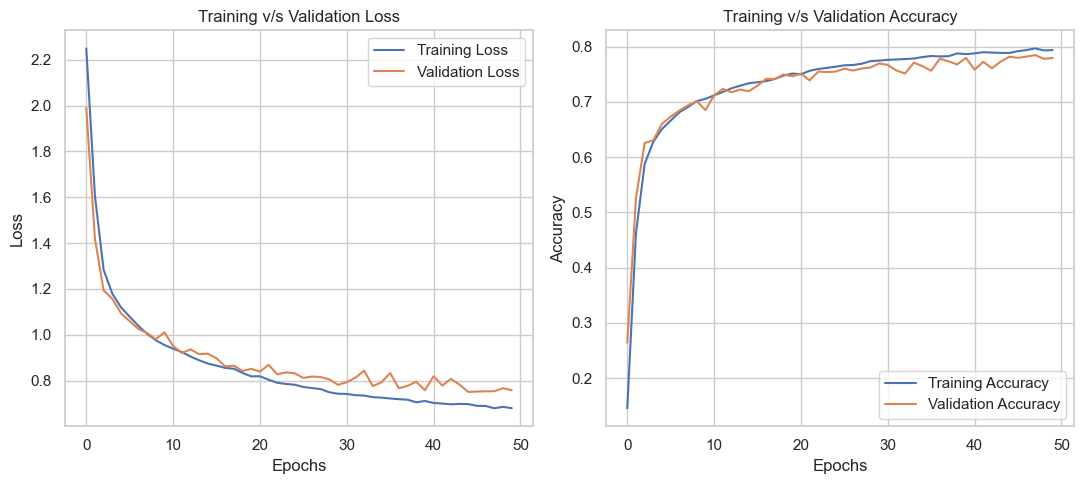

In [44]:
plt.figure(figsize=(11, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_class.history['loss'], label='Training Loss')
plt.plot(train_class.history['val_loss'], label='Validation Loss')
plt.title('Training v/s Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_class.history['accuracy'], label='Training Accuracy')
plt.plot(train_class.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training v/s Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Rapid Improvement in Early Epochs (1-10):

The model shows significant improvement, with training accuracy increasing from 11.30% to 70.09% and validation accuracy rising from 26.42% to 70.17%. This indicates that the model is quickly learning from the data.

#### Stabilization and Gradual Progress (11-20):

Training accuracy stabilizes around 71-75%, with validation accuracy hovering between 71% and 75%. Loss values also decrease steadily. The model is still learning but at a slower pace.

#### Overfitting Concerns (21-30):

Training accuracy continues to improve, reaching 77.99%, but validation accuracy shows slight fluctuations, peaking around 77.98% and then slightly declining. This suggests that the model might be starting to overfit the training data.

#### Final Epochs (31-50):

The model reaches 79.86% training accuracy with a 78.48% validation accuracy. The validation loss stabilizes but shows minor fluctuations, indicating that the model is near its optimal performance.

#### Model Performance:

By the 50th epoch, the model achieves a strong balance between training and validation accuracy, with the final accuracy figures being close, suggesting a well-trained model with minimal overfitting.

#### Summary:

The model performs well, with no drastic signs of overfitting, and it shows a steady improvement in both accuracy and loss over the epochs.

